In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec
import datetime
from datetime import date
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from statsmodels.tsa.arima_model import ARIMA

In [2]:
df= pd.read_csv('C:/Users/DELL/OneDrive/Desktop/project/covid_19_data.csv')
confirmed_df= pd.read_csv('C:/Users/DELL/OneDrive/Desktop/project/confirmed.csv')
deaths_df= pd.read_csv('C:/Users/DELL/OneDrive/Desktop/project/deaths.csv')
recoveries_df= pd.read_csv('C:/Users/DELL/OneDrive/Desktop/project/recovered.csv')

In [3]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [4]:
df=df[df['Confirmed']!=0]

In [5]:
df.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
5,6,01/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26.0,0.0,0.0


In [6]:
cols = confirmed_df.keys()

In [7]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [8]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 

india_cases=[]
china_cases=[] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
france_cases = [] 
germany_cases = [] 
uk_cases = [] 

india_deaths=[]
china_deaths = [] 
italy_deaths = []
us_deaths = [] 
spain_deaths = [] 
france_deaths = [] 
germany_deaths = [] 
uk_deaths = [] 

india_recoveries=[]
china_recoveries = [] 
italy_recoveries = []
us_recoveries = [] 
spain_recoveries = [] 
france_recoveries = [] 
germany_recoveries = [] 
uk_recoveries = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    france_cases.append(confirmed_df[confirmed_df['Country/Region']=='France'][i].sum())
    germany_cases.append(confirmed_df[confirmed_df['Country/Region']=='Germany'][i].sum())
    uk_cases.append(confirmed_df[confirmed_df['Country/Region']=='United Kingdom'][i].sum())
    
    india_deaths.append(deaths_df[deaths_df['Country/Region']=='India'][i].sum())
    china_deaths.append(deaths_df[deaths_df['Country/Region']=='China'][i].sum())
    italy_deaths.append(deaths_df[deaths_df['Country/Region']=='Italy'][i].sum())
    us_deaths.append(deaths_df[deaths_df['Country/Region']=='US'][i].sum())
    spain_deaths.append(deaths_df[deaths_df['Country/Region']=='Spain'][i].sum())
    france_deaths.append(deaths_df[deaths_df['Country/Region']=='France'][i].sum())
    germany_deaths.append(deaths_df[deaths_df['Country/Region']=='Germany'][i].sum())
    uk_deaths.append(deaths_df[deaths_df['Country/Region']=='United Kingdom'][i].sum())
    
    india_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='India'][i].sum())
    china_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='China'][i].sum())
    italy_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Italy'][i].sum())
    us_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='US'][i].sum())
    spain_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Spain'][i].sum())
    france_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='France'][i].sum())
    germany_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Germany'][i].sum())
    uk_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='United Kingdom'][i].sum())

In [9]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

# confirmed cases
world_daily_increase = daily_increase(world_cases)
india_daily_increase = daily_increase(india_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
france_daily_increase = daily_increase(france_cases)
germany_daily_increase = daily_increase(germany_cases)
uk_daily_increase = daily_increase(uk_cases)

# deaths
world_daily_death = daily_increase(total_deaths)
india_daily_death = daily_increase(india_deaths)
china_daily_death = daily_increase(china_deaths)
italy_daily_death = daily_increase(italy_deaths)
us_daily_death = daily_increase(us_deaths)
spain_daily_death = daily_increase(spain_deaths)
france_daily_death = daily_increase(france_deaths)
germany_daily_death = daily_increase(germany_deaths)
uk_daily_death = daily_increase(uk_deaths)

# recoveries
world_daily_recovery = daily_increase(total_recovered)
india_daily_recovery = daily_increase(india_recoveries)
china_daily_recovery = daily_increase(china_recoveries)
italy_daily_recovery = daily_increase(italy_recoveries)
us_daily_recovery = daily_increase(us_recoveries)
spain_daily_recovery = daily_increase(spain_recoveries)
france_daily_recovery = daily_increase(france_recoveries)
germany_daily_recovery = daily_increase(germany_recoveries)
uk_daily_recovery = daily_increase(uk_recoveries)

In [10]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [11]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [12]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [13]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, india_cases,
                                                                                            test_size=0.4, shuffle=False) 

In [14]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=6, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

R score: 0.9544629883205045


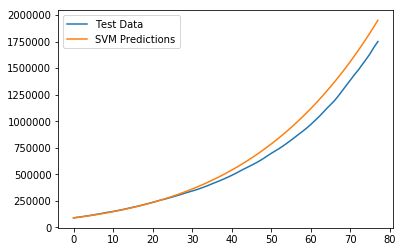

In [15]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)

plt.legend(['Test Data', 'SVM Predictions'])
print('R score:',r2_score(y_test_confirmed,svm_test_pred))

In [16]:
# Future predictions using SVM 
svm_ind = pd.DataFrame({'Date': future_forcast_dates[-10:],'Predicted of Confirmed Cases in india': np.round(svm_pred[-10:])})
svm_ind

,Date,Predicted of Confirmed Cases in india
0,08/02/2020,2012582.0
1,08/03/2020,2075969.0
2,08/04/2020,2141011.0
3,08/05/2020,2207743.0
4,08/06/2020,2276199.0
5,08/07/2020,2346414.0
6,08/08/2020,2418425.0
7,08/09/2020,2492269.0
8,08/10/2020,2567981.0
9,08/11/2020,2645601.0


In [17]:
x_train_confirmed, x_test_confirmed, Y_train_confirmed, Y_test_confirmed = train_test_split(days_since_1_22, india_cases,
                                                                                            test_size=0.3, shuffle=False) 

In [18]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=5)
poly_x_train_confirmed = poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed = poly.fit_transform(x_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [19]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(poly_x_train_confirmed, Y_train_confirmed)
test_linear_pred = linear_model.predict(poly_x_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

R score: 0.9942354701438186


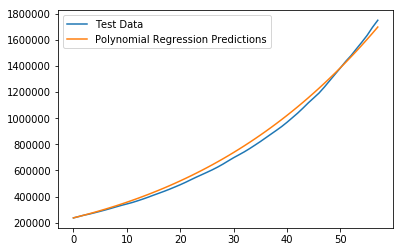

In [20]:
plt.plot(Y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
print('R score:',r2_score(Y_test_confirmed,test_linear_pred))

In [21]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_ind = pd.DataFrame({'Date': future_forcast_dates[-10:],'Predicted Confirmed Cases in India': np.round(linear_pred[-10:])})
poly_ind

,Date,Predicted Confirmed Cases in India
0,08/02/2020,1747539.0
1,08/03/2020,1797429.0
2,08/04/2020,1848444.0
3,08/05/2020,1900604.0
4,08/06/2020,1953927.0
5,08/07/2020,2008433.0
6,08/08/2020,2064142.0
7,08/09/2020,2121072.0
8,08/10/2020,2179244.0
9,08/11/2020,2238679.0


# worldwide cases

In [22]:
#X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases,
                                                                                            #test_size=0.1, shuffle=False) 

In [23]:
# svm_confirmed = svm_search.best_estimator_
'''svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)'''

"svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=7, C=0.1)\nsvm_confirmed.fit(X_train_confirmed, y_train_confirmed)\nsvm_pred = svm_confirmed.predict(future_forcast)"

In [24]:
# check against testing data
'''svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
r2_score(y_test_confirmed,svm_test_pred)'''

"svm_test_pred = svm_confirmed.predict(X_test_confirmed)\nplt.plot(y_test_confirmed)\nplt.plot(svm_test_pred)\nplt.legend(['Test Data', 'SVM Predictions'])\nr2_score(y_test_confirmed,svm_test_pred)"

In [25]:
# Future predictions using SVM 
#svm_world = pd.DataFrame({'Date': future_forcast_dates[-10:],'Predicted of Confirmed Cases in world': np.round(svm_pred[-10:])})
#svm_world

In [26]:
x_train_confirmed, x_test_confirmed, Y_train_confirmed, Y_test_confirmed = train_test_split(days_since_1_22, world_cases,
                                                                                            test_size=0.4, shuffle=False) 

In [27]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=2)
poly_x_train_confirmed = poly.fit_transform(x_train_confirmed)
poly_x_test_confirmed = poly.fit_transform(x_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [28]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=True)
linear_model.fit(poly_x_train_confirmed, Y_train_confirmed)
test_linear_pred = linear_model.predict(poly_x_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)

R score: 0.9852863584945944


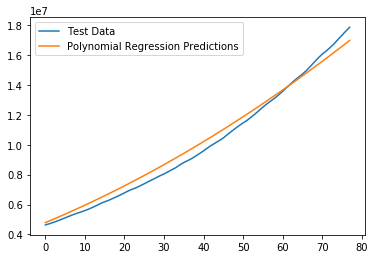

In [29]:
plt.plot(Y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])
print('R score:',r2_score(Y_test_confirmed,test_linear_pred))

In [30]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_world = pd.DataFrame({'Date': future_forcast_dates[-10:],'Predicted Confirmed Cases worldwide': np.round(linear_pred[-10:])})
poly_world

,Date,Predicted Confirmed Cases worldwide
0,08/02/2020,17182879.0
1,08/03/2020,17390700.0
2,08/04/2020,17599762.0
3,08/05/2020,17810064.0
4,08/06/2020,18021606.0
5,08/07/2020,18234389.0
6,08/08/2020,18448412.0
7,08/09/2020,18663676.0
8,08/10/2020,18880180.0
9,08/11/2020,19097924.0


In [31]:
df['ObservationDate'] = pd.to_datetime(df['ObservationDate'])
#df['Last Update'] = pd.to_datetime(df['Last Update'])
df['Confirmed']=df['Confirmed'].astype('int')
df['Deaths']=df['Deaths'].astype('int')
df['Recovered']=df['Recovered'].astype('int')

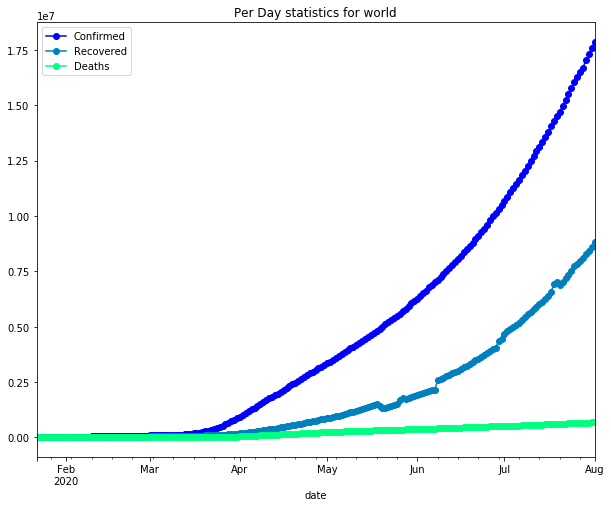

In [32]:
world_cases=df
world_cases['date'] = world_cases['ObservationDate'].dt.date
world_cases['date']=pd.to_datetime(world_cases['date'])
world_cases = world_cases[world_cases['date'] > pd.Timestamp(date(2020,1,21))]
num_plot= world_cases.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot.plot(figsize=(10,8),colormap='winter',title='Per Day statistics for world',marker='o')
num_plot_world=num_plot.reset_index()

[Text(0, 0.5, 'Confirmed Cases'), Text(0.5, 0, 'Date')]

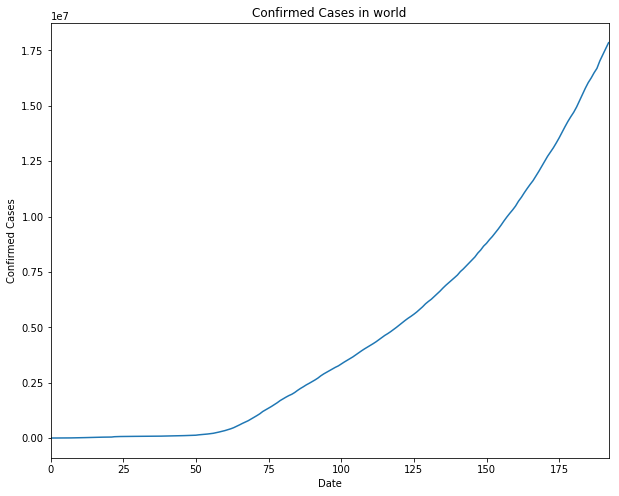

In [33]:
#Current number of confirmed cases
ax = num_plot_world['Confirmed'].plot(title="Confirmed Cases in world",figsize=(10,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


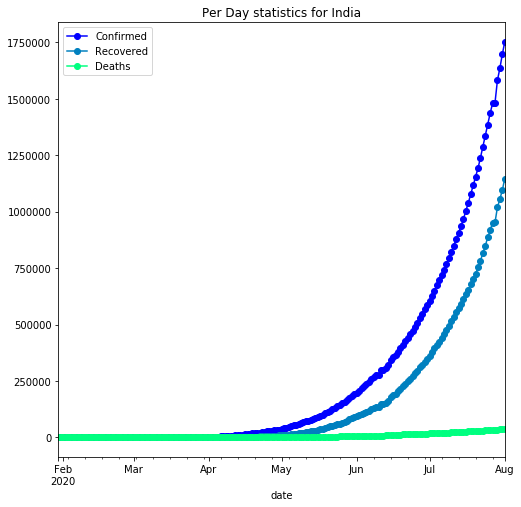

In [34]:
india_cases_complete=df.loc[df['Country/Region']=='India']
india_cases_complete['date'] = india_cases_complete['ObservationDate'].dt.date
india_cases_complete['date']=pd.to_datetime(india_cases_complete['date'])
india_cases_complete = india_cases_complete[india_cases_complete['date'] > pd.Timestamp(date(2020,1,21))]
num_plot1= india_cases_complete.groupby('date')["Confirmed", "Recovered", "Deaths"].sum()
num_plot1.plot(figsize=(8,8),colormap='winter',title='Per Day statistics for India',marker='o')
num_plot_india=num_plot1.reset_index()

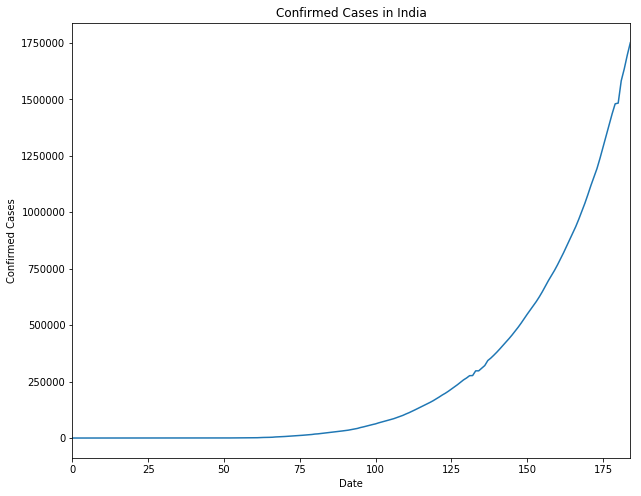

In [35]:
#Current number of confirmed cases
ax = num_plot_india['Confirmed'].plot(title="Confirmed Cases in India",figsize=(10,8));
ax.set(xlabel="Date", ylabel="Confirmed Cases");

In [36]:
a=num_plot_world[['date','Confirmed']]

In [37]:
a.set_index('date',inplace=True)
a.head()

,Confirmed
date,
2020-01-22,555
2020-01-23,653
2020-01-24,941
2020-01-25,1438
2020-01-26,2118


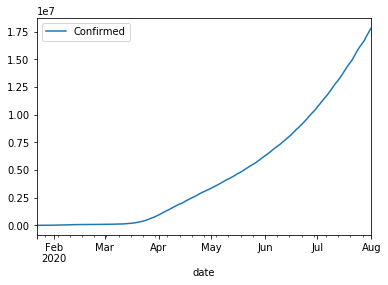

In [38]:
a.plot()

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
test_result=adfuller(a['Confirmed'])

In [41]:
def adfuller_test(confirmed):
    result=adfuller(confirmed)
    lables=['ADF Test Statstic','p-value','#lags used','no of observations used']
    for value,lable in zip(result,lables):
        print(lable+':'+str(value))
    if result[1]<=0.05:
        print('data is stationary')
    else:
        print('data is non stationary')

In [42]:
adfuller_test(a['Confirmed'])

ADF Test Statstic:1.3816473043682713
p-value:0.9970291527041599
#lags used:12
no of observations used:180
data is non stationary


In [43]:
a['first diff']=a['Confirmed']-a['Confirmed'].shift(55)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [44]:
adfuller_test(a['first diff'].dropna())

ADF Test Statstic:1.3783062990094206
p-value:0.997013327750644
#lags used:12
no of observations used:125
data is non stationary


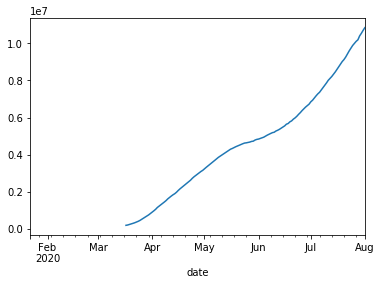

In [45]:
a['first diff'].plot()

In [46]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

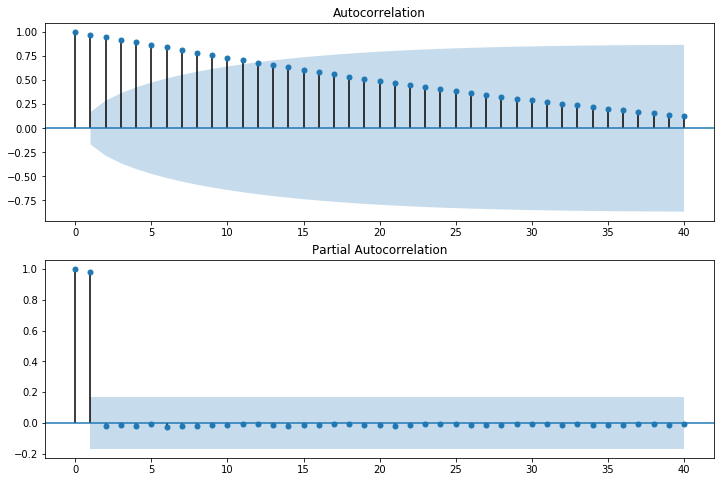

In [47]:
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(a['first diff'].iloc[57:],lags=40,ax=ax1)
ax2=fig.add_subplot(212)
fig=plot_pacf(a['first diff'].iloc[57:],lags=40,ax=ax2)

In [48]:
train1= num_plot_world.iloc[:-5,:2]
test1= num_plot_world.iloc[-5:,:2]

In [49]:
train1.rename(columns={"date":"ds1","Confirmed":"y1"},inplace=True)
test1.rename(columns={"date":"ds1","Confirmed":"y1"},inplace=True)
test1= test1.set_index("ds1")
test1= test1['y1']

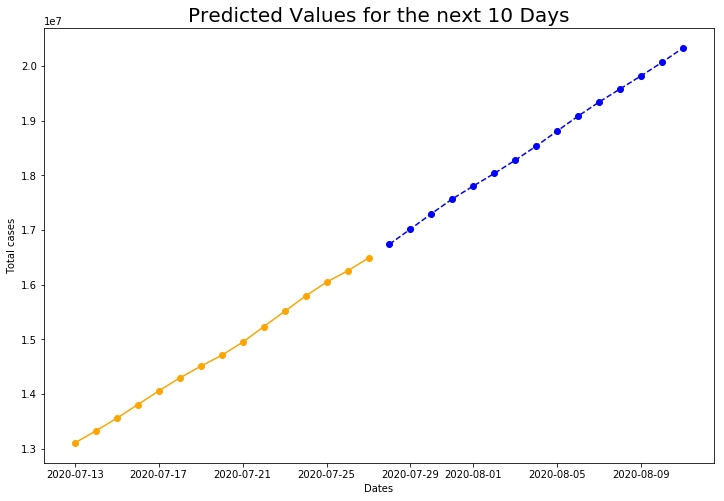

In [50]:
arima = ARIMA(train1['y1'], order=(7, 2, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 15)
pred = list(forecast[0])
start_date = train1['ds1'].max()
prediction_dates = []
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (12,8))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 10 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=train1['y1'].tail(15),x=train1['ds1'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

In [55]:
pred=pd.DataFrame(forecast[0],columns=['Predicted for world'])
dates=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df=pd.merge(dates,pred,right_index=True,left_index=True)

In [57]:
arima_df['Predicted for world']=arima_df['Predicted for world'].astype(int)

In [58]:
arima_df.tail(10)

,Date,Predicted for world
5,2020-08-02,18037466
6,2020-08-03,18279693
7,2020-08-04,18539334
8,2020-08-05,18814280
9,2020-08-06,19088759
10,2020-08-07,19344970
11,2020-08-08,19584790
12,2020-08-09,19823879
13,2020-08-10,20072364
14,2020-08-11,20335709


In [59]:
train = num_plot_india.iloc[:-5,:2]
test = num_plot_india.iloc[-5:,:2]

In [60]:
train.dropna(inplace=True)
test.dropna(inplace=True)

In [61]:
train.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test.rename(columns={"date":"ds","Confirmed":"y"},inplace=True)
test = test.set_index("ds")
test = test['y']

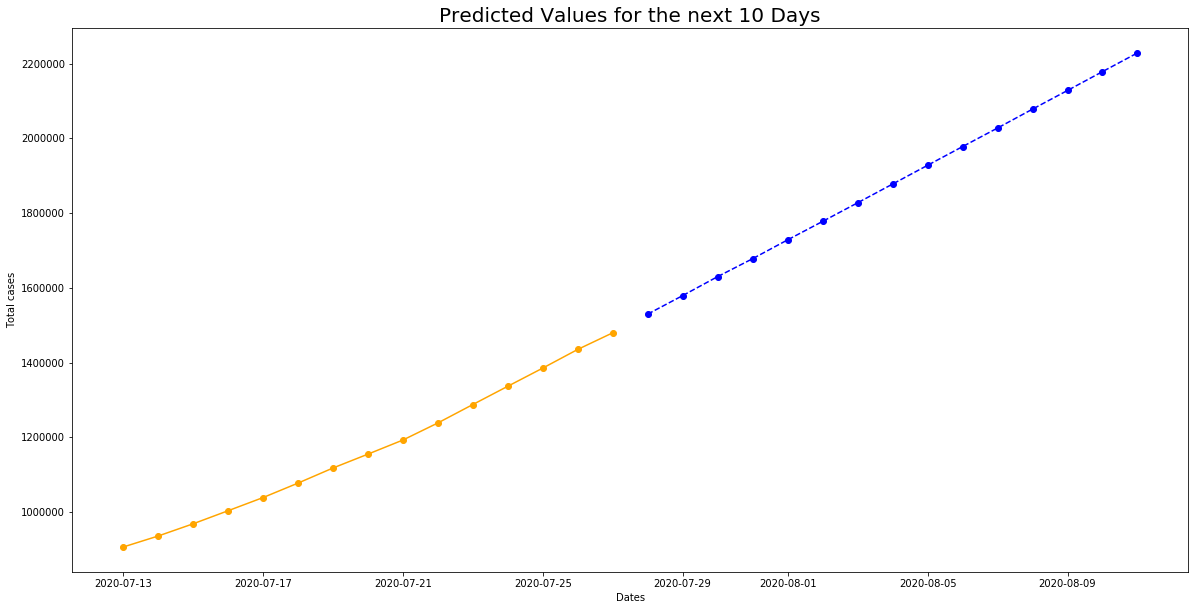

In [62]:
arima = ARIMA(train['y'], order=(7, 2, 0))
arima = arima.fit(trend='nc', full_output=True, disp=True)
forecast = arima.forecast(steps= 15)
pred = list(forecast[0])
start_date = train['ds'].max()
prediction_dates = []
for i in range(15):
    date = start_date + datetime.timedelta(days=1)
    prediction_dates.append(date)
    start_date = date
plt.figure(figsize= (20,10))
plt.xlabel("Dates",fontsize = 10)
plt.ylabel('Total cases',fontsize = 10)
plt.title("Predicted Values for the next 10 Days" , fontsize = 20)

plt.plot_date(y= pred,x= prediction_dates,linestyle ='dashed',color = 'blue',label = 'Predicted')
plt.plot_date(y=train['y'].tail(15),x=train['ds'].tail(15),linestyle = '-',color = 'orange',label = 'Actual')

In [64]:
pred1=pd.DataFrame(forecast[0],columns=['Predicted for India'])
dates1=pd.DataFrame(prediction_dates,columns=['Date'])
arima_df1=pd.merge(dates1,pred1,right_index=True,left_index=True)

In [66]:
arima_df1['Predicted for India']=arima_df1['Predicted for India'].astype(int)

In [67]:
arima_df1.tail(10)

,Date,Predicted for India
5,2020-08-02,1778123
6,2020-08-03,1827868
7,2020-08-04,1878052
8,2020-08-05,1928216
9,2020-08-06,1978262
10,2020-08-07,2027957
11,2020-08-08,2078531
12,2020-08-09,2128475
13,2020-08-10,2178875
14,2020-08-11,2228963


In [68]:
test=test.reset_index()

In [69]:
df1=pd.DataFrame(forecast[0],columns=['yhat'])
df2=pd.DataFrame(prediction_dates,columns=['ds'])
df3=test['y']
df4=pd.merge(df2,df3,right_index=True,left_index=True)
df5=pd.merge(df4,df1,right_index=True,left_index=True)

In [70]:
df5['mse'],df5['rmse'],df5['mae'],df5['mape'],df5['mdape']=[0,0,0,0,0]

In [71]:
for t in range(len(test)):
    mape =  np.mean(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mape'][t]="{:.5f}".format(mape)
    mdape =  np.median(np.abs(df5['yhat'][t] - df5['y'][t])/np.abs(df5['y'][t]))
    df5['mdape'][t]="{:.5f}".format(mdape)
    mae = np.mean(np.abs(df5['yhat'][t] - df5['y'][t]))
    df5['mae'][t]=mae
    mse = np.mean((df5['yhat'][t] - df5['y'][t])**2)
    df5['mse'][t]=mse
    rmse = np.mean((df5['yhat'][t] - df5['y'][t])**2)**.5
    df5['rmse'][t]=rmse

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\ProgramData\An

In [72]:
df5

,ds,y,yhat,mse,rmse,mae,mape,mdape
0,2020-07-28,1483156,1.530102e+06,2203928890,46946,46946,0.03165,0.03165
1,2020-07-29,1581963,1.579664e+06,5283179,2298,2298,0.00145,0.00145
2,2020-07-30,1634746,1.630430e+06,18625574,4315,4315,0.00264,0.00264
3,2020-07-31,1695988,1.678412e+06,308907841,17575,17575,0.01036,0.01036
4,2020-08-01,1750723,1.728763e+06,482232245,21959,21959,0.01254,0.01254


In [74]:
dates=arima_df.tail(10)['Date']
aw=arima_df.tail(10)['Predicted for world']
ai=arima_df1.tail(10)['Predicted for India']
pw=poly_world['Predicted Confirmed Cases worldwide']
pi=poly_ind['Predicted Confirmed Cases in India']
#sw=svm_world['Predicted of Confirmed Cases in world']
si=svm_ind['Predicted of Confirmed Cases in india']

In [75]:
model_predictions=pd.DataFrame(zip(dates,pw,aw,si,pi,ai),
                               columns=['Date','Polynonmial Regression Prediction for world',
                                       'Arima prediction for world','SVM Prediction for India',
                                       'Polynonmial Regression Prediction for India','Arima prediction for India'])
model_predictions

,Date,Polynonmial Regression Prediction for world,Arima prediction for world,SVM Prediction for India,Polynonmial Regression Prediction for India,Arima prediction for India
0,2020-08-02,17182879.0,18037466,2012582.0,1747539.0,1778123
1,2020-08-03,17390700.0,18279693,2075969.0,1797429.0,1827868
2,2020-08-04,17599762.0,18539334,2141011.0,1848444.0,1878052
3,2020-08-05,17810064.0,18814280,2207743.0,1900604.0,1928216
4,2020-08-06,18021606.0,19088759,2276199.0,1953927.0,1978262
5,2020-08-07,18234389.0,19344970,2346414.0,2008433.0,2027957
6,2020-08-08,18448412.0,19584790,2418425.0,2064142.0,2078531
7,2020-08-09,18663676.0,19823879,2492269.0,2121072.0,2128475
8,2020-08-10,18880180.0,20072364,2567981.0,2179244.0,2178875
9,2020-08-11,19097924.0,20335709,2645601.0,2238679.0,2228963
